### MiniProyecto6
##### Andrei Portales 19
##### Hugo Román 19199


In [59]:
import random
import matplotlib.pyplot as plt
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose


### Ejercicio 1

1. Cree un programa en su lenguaje de programación favorito que use el método de Monte Carlo para
determinar la probabilidad de cara o escudo en una moneda justa
2. Grafique usando una gráfica de línea las iteraciones (eje x) y la probabilidad de de las mismas (eje y).


0.514


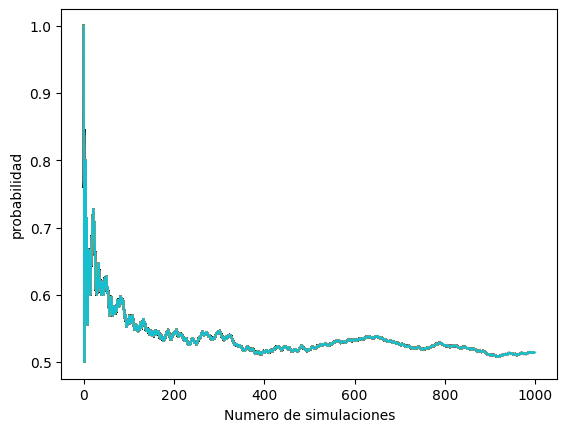

In [60]:
from matplotlib.lines import lineStyles


def lanzamiento():
    # Generar un numero entre 0 y 1
    x = random.uniform(0, 1)
    return random.randint(0,1)
    
probabilidad = []
 
#simulando 1000 experimentos
def MonteCarloSimulation(iteraciones):
    resultados = 0
    for i in range(iteraciones):
        flip = lanzamiento() #llamar a la función de lanzamiento
        resultados += flip #contador
        probI = resultados/(i+1) #obtener el valor de la var resultados
        probabilidad.append(probI) #append al array probabilidad
        
        #creacion de la grafica
        #plt.axhline(y=0.5,color = 'b', linestyle = '-')
        plt.xlabel("Numero de simulaciones")
        plt.ylabel("probabilidad")
        plt.plot(probabilidad)
    
    return resultados/iteraciones

valor = MonteCarloSimulation(1000)
print(valor)
        
  

### Ejercicio 2

Consideren un juego imaginario en el que el jugador tiene que escoger una token numerado de 1 a 100 de una caja.

Las reglas son las siguientes:
1. Los tokens están numerados de 1 a 100 en la caja
2. Los jugadores pueden apostar por un número par o impar que saldrá al tomar el token de la caja
3. En este juego, 10 y 11 son números especiales. Si se apuesta por un número par, entonces 10 será considerado un número impar; si se apuesta por un número impar, entonces 11 será considerado como un número par.
4. Si se apuesta por un número par y se obtiene 10 entonces se pierde.
5. Si se apuesta por un número impar y se obtiene 11 entonces se pierde

In [61]:
def simulate_game(dinero_total, dinero_apuesta, juegos_totales):
    money = dinero_total
    apuestas = 0

    for game in range(juegos_totales):
        apuesta = random.randint(0, 1)
        apuestas += 1
        token = random.randint(1, 100)

        ispar = token % 2 == 0

        if apuesta == 0 and ispar:
            if token == 10:
                break
            money += dinero_apuesta
        else:
            money -= dinero_apuesta

        if apuesta == 1 and not ispar:
            if token == 11:
                break
            money += dinero_apuesta
        else:
            money -= dinero_apuesta

        if money <= 0:
            break
    return money, apuestas

In [62]:
a = [simulate_game(100, 1, 50) for i in range(10)]
b = [simulate_game(100, 1, 50) for i in range(1000)]
c = [simulate_game(100, 1, 10000) for i in range(10)]

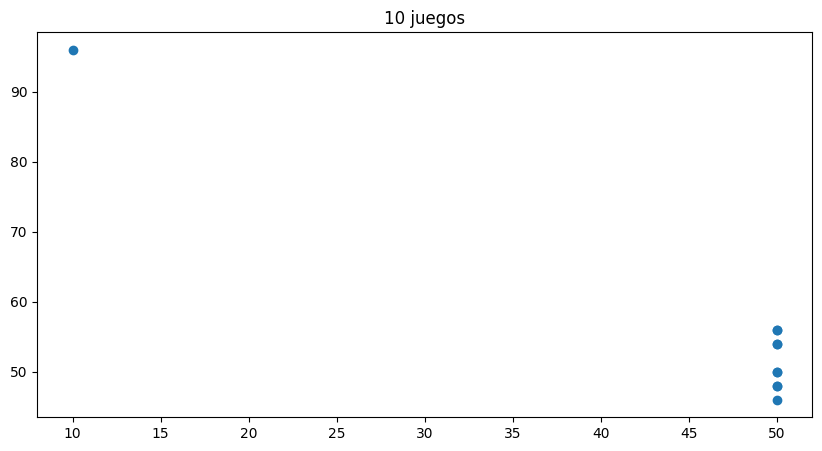

In [63]:
plt.figure(figsize=(10, 5))
plt.title("10 juegos")
ejex = [i[1] for i in a]
ejey = [i[0] for i in a]
plt.scatter(ejex, ejey)

## Ejercicio 3

1. Usando una acercamiento basado en Markov Chain Monte Carlo (Cadenas de Markov con Monte Carlo)
encuentre la ruta que minimice el costo
a. Especifique el orden de vista y el costo de dicha ruta

In [64]:
# lista de coordinadas
coords_list = [(1, 1), (1, 5), (3,8), (6, 6), (8, 4), (7, 2), (5, 3), (3, 1)]


fitness_coords = mlrose.TravellingSales(coords = coords_list)



In [67]:

dist_list = [(0, 1, 5), (0, 2, 7), (0, 3, 6), (0, 4, 12), 
             (0, 5, 4), (0,6 , 7), (0, 7, 7), (1, 2, 2),
             (1, 3, 4), (1, 4, 3), (1, 5, 9), (1, 6, 9), 
             (1, 7, 7), (2, 3, 1), (2, 4, 8), (2, 5, 11), 
             (2, 6, 14), (2, 7, 12), (3,4, 7), (3, 5, 10), 
             (3,6 , 13), (3, 7, 11), (4, 5, 9), (4, 6, 6), 
             (4, 7, 4), (5, 6, 3), (5, 7, 5), (6, 7, 2)] 



fitness_dists = mlrose.TravellingSales(distances = dist_list)
problem_fit = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coords,
                            maximize=False)
problem_no_fit = mlrose.TSPOpt(length = 8, coords = coords_list,
                               maximize=False)
best_state, best_fitness = mlrose.genetic_alg(problem_fit, random_state = 2)

import copy

N = 8 

distance = dist_list

def cal_dist(distance, L):
    d = 0
    for i in range(len(L)):
        d = d + distance[L[i % N], L[(i + 1) % N]]
    return d

T = float(pow(2, -8)) 

ITER = 10000
L = np.arange(N)
print(cal_dist(distance, L))
dist_all = []
for i in range(ITER):
    a = np.random.randint(1, N - 1)
    d_t = cal_dist(distance, L)
    dist_all.append(d_t)
    L_tmp = copy.copy(L)
    L_tmp[[a, (a + 1)%N]] = L_tmp[[(a + 1)%N, a]]
    delta_d = cal_dist(distance, L_tmp) - d_t
    p = min(1, np.exp(-1 * delta_d / T))
    u = np.random.rand()
    if u < p:
        L = L_tmp

print(cal_dist(distance, L)) 
print('Orden: ', best_state)

print('Costo: ', best_fitness)


Orden:  [7 6 5 4 3 2 1 0]
Costo:  23.34009275541994
